# Making plots with `matplotlib`

`matplotlib` is a comprehensive package for making plots with Python. This notebook shows the basic steps to make a plot, including figure size, axis labels, font sizes and legends.

`matplotlib` can seem complicated and sometimes frustrating, for at least two reasons:
 
 - it started life as an 'emulator' for the functionality of MatLab, so some parts of the design are not very 'Pythonic'
 - it tries to do 'everything'

Some people really don't like the design of `matplotlib` and there are a number of new alternatives. This tutorial is based on `matplotlib` only because I don't use those alternatives, and because `matplotlib` is still overwhelmingly more common. 

Here are some other tutorials about `matplotlib`:

[matplotlib official sie](https://matplotlib.org/users/tutorials.html)

[anaconda.org](https://anaconda.org/ijstokes/16-visualization-matplotlib/notebook)

It's also worth looking at the gallery of examples [here](http://matplotlib.org/gallery.html).

Frustratingly there are some small differences between making plots in a jupyter notebook, making them in an ipython terminal, and making them in by running python code from a file. Experiment with all three and watch out below. More about plots in Jupyter notebooks [here](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb).

In [4]:
import matplotlib

# Because we're working in a Jupyter notebook, we have to run this magic command to have the plots show up
# automatically in the output cells, which we wouldn't have to do in IPython or when running from a file.
%matplotlib inline

Importing the `matplotlib` module on its own is not very useful. There is a submodule called `pyplot` that includes simple wrappers that make most of the standard types of plots. IPython can be started with the option --pylab that (among other things) automatically imports the functions from this module into the top level interactive scope (i.e. the same as typing `from matplotlib pyplot import *` at the prompt), but in non-interactive scripts it's clearer to import it with a shortened name, like this: 

In [5]:
import matplotlib.pyplot as pl # Ignore any warnings about the font cache

First this shows how to  make a very simple line plot as quickly as possible, based on a list of numbers.

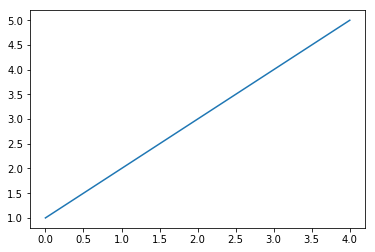

In [6]:
pl.plot([1,2,3,4,5]);

Now let's do the same thing but broken down into several steps, as we would in a more complicated case where we wanted to tweak the appearance of the plot, or build up the plot from several datasets. There are a lot of options and different types of plot in matplotlib. these are just a few of them.

Created a figure with number 1


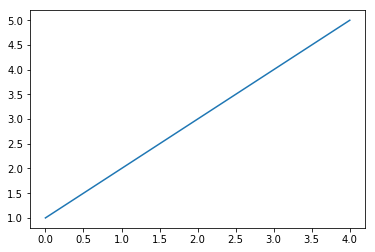

In [7]:
# Figures are the highest-level matplotlib object you need to worry about.
f_a    = pl.figure() # This creates a new figure.
print('Created a figure with number %d'%(f_a.number)) # Each figure has a unique number

data = [1,2,3,4,5]
pl.plot(data) # This draws a set of axes into the current figure

ax = pl.gca() # This gets the current axis from the figure.

Resize the figure:

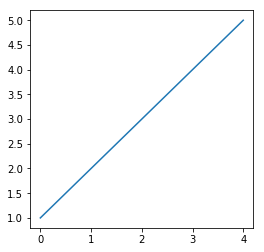

In [11]:
f_a    = pl.figure() 
pl.plot(data)
f_a.set_size_inches(4,4) # Yes, inches...

Plot two lines on the same figure.

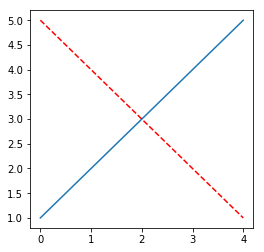

In [12]:
f_a    = pl.figure(figsize=(4,4)) 
pl.plot(data)
pl.plot(data[::-1],c='r',linestyle='--') # This draws another line in the same axes.

Add axis labels.

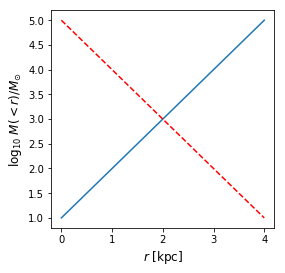

In [13]:
f_a    = pl.figure(figsize=(4,4)) 
pl.plot(data)
pl.plot(data[::-1],c='r',linestyle='--')

# Note that these are writen in LaTeX math mode, using $$! (they don't have to be, but it looks nicer)
pl.xlabel('$r$ $\mathrm{[kpc]}$',fontsize=12)
pl.ylabel('$\log_{10}\;M(<r)/M_{\odot}$',fontsize=12);

Take away the tick labels at the corners (**This doesn't do anything now that the default matplotlib style has changed!** -- pretend you didn't see this cell and move on...) 

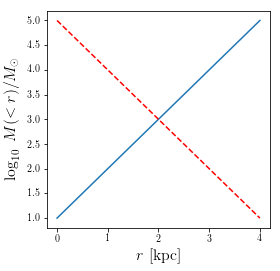

In [53]:
f_a    = pl.figure(figsize=(4,4)) 
pl.plot(data)
pl.plot(data[::-1],c='r',linestyle='--')
pl.xlabel('$r$ $\mathrm{[kpc]}$',fontsize=16)
pl.ylabel('$\log_{10}\;M(<r)/M_{\odot}$',fontsize=16)
ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)

Make the tick labels larger using `fontsize`:

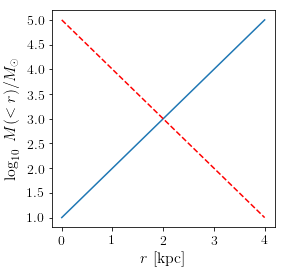

In [55]:
f_a    = pl.figure(figsize=(4,4)) 
pl.plot(data)
pl.plot(data[::-1],c='r',linestyle='--')
pl.xlabel('$r$ $\mathrm{[kpc]}$',fontsize=16)
pl.ylabel('$\log_{10}\;M(<r)/M_{\odot}$',fontsize=16)
ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
    
pl.setp(ax.get_xticklabels(),fontsize=14); # suppress output
pl.setp(ax.get_yticklabels(),fontsize=14); # suppress output

Use LaTeX to render all the text on the plot, not just the math mode expressions we used for the axis labels:

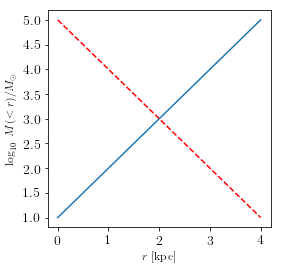

In [44]:
# This may take a longer time to run because latex is being run in the background!
from matplotlib import rc
rc('text', usetex=True)

f_a    = pl.figure(figsize=(4,4)) 
pl.plot(data)
pl.plot(data[::-1],c='r',linestyle='--')
pl.xlabel('$r$ $\mathrm{[kpc]}$',fontsize=16)
pl.ylabel('$\log_{10}\;M(<r)/M_{\odot}$',fontsize=16)
ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)

pl.setp(ax.get_xticklabels(),fontsize=14); # suppress output
pl.setp(ax.get_yticklabels(),fontsize=14); # suppress output

A more complete example, this time of a scatter plot. You should be able to figure out what's happening yourself using the docstrings for the routines involved, and a bit of googling.


In [26]:
import numpy as np

# Here are some random data for two variables. Read the docs to figure out how they're generated.
x = np.random.normal(loc=50,scale=20,size=1000)
y = np.random.normal(loc=x+5,scale=10,size=1000)

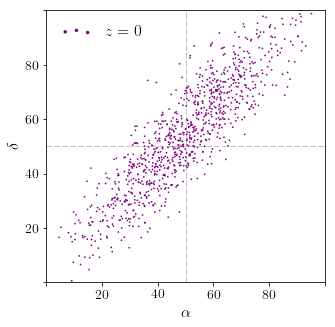

In [52]:
f = pl.figure(figsize=(5,5))
ax = pl.gca()
ax.scatter(x,y,s=3,edgecolor='None',c='purple',label='$z=0$')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.axhline(50.0,linestyle='--',c='grey',lw=0.5,zorder=-10) # What do these lines do?
ax.axvline(50.0,linestyle='--',c='grey',lw=0.5,zorder=-10)

pl.setp(ax.get_xticklabels(),fontsize=14)
pl.setp(ax.get_yticklabels(),fontsize=14)

for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$\alpha$',fontsize=16) # What happens without the r at the start here?
ax.set_ylabel(r'$\delta$',fontsize=16)

pl.legend(loc='upper left',fontsize=16, frameon=False,scatterpoints=3,markerscale=2);

To save the figure, use `savefig`:

In [37]:
f = pl.figure(figsize=(5,5))
ax = pl.gca()
ax.scatter(x,y,s=3,edgecolor='None',c='purple',label='$z=0$')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.axhline(50.0,linestyle='--',c='grey',lw=0.5,zorder=-10)
ax.axvline(50.0,linestyle='--',c='grey',lw=0.5,zorder=-10)

pl.setp(ax.get_xticklabels(),fontsize=14)
pl.setp(ax.get_yticklabels(),fontsize=14)

for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel(r'$\delta$',fontsize=16)

pl.legend(loc='upper left',fontsize=16, frameon=False,scatterpoints=3,markerscale=2);
# Save the figure as a png. To save in a differnt format, e.g. pdf, just change the extension!
pl.savefig('my_scatter_plot.png',bbox_inches='tight',pad_inches=None)
# Close the figure
pl.close(f)

See if you can open the `.png` file that was saved in the preceding cell in another application. The cell below includes it in this notebook using html.

<img src='./my_scatter_plot.png'>

In a normal IPython you can also make plots interactively (one line at a time, rather than having to write out code for the whole plot each time as in the examples above). For this to work in a natural way, the easiest thing to do is to start IPython like this:
```
> ipython --pylab
```
With this option, all the commands in pyplot will be imported as if you'd written `from matplotlib.pyplot import *`, and the interactive plot windows will work as you might expect. So you can type:
```
In[ ] : plot([1,2,3,4])
```
and a window will pop up with the plot in it.

------
*Further reading*

The docstrings for each of these functions are worth reading:
    -
    - matplotlig.pyplot.savefig
    - matplotlib.pyplot.imshow
    - matplotlib.pyplot.hist
    - matplotlib.pyplot.text

You can customize matplotlib's default parameters, so less tweaking is required:
https://matplotlib.org/users/customizing.html